In [0]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [0]:
# read data into a DataFrame
data = pd.read_csv('nyc-rolling-sales.csv', index_col=0)

In [100]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [0]:
# take a subset of our data
columns = ['RESIDENTIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'SALE PRICE']
subset_data = data[columns]

In [102]:
# Get number of (rows, columns)
subset_data.shape

(84548, 4)

In [103]:
# Get first 5 rows
subset_data.head()

,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,SALE PRICE
4,5,5,1633,6625000
5,28,31,4616,-
6,16,17,2212,-
7,10,10,2272,3936272
8,6,6,2369,8000000


In [104]:
# Get last 5 rows
subset_data.tail()

,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,SALE PRICE
8409,2,2,2400,450000
8410,2,2,2498,550000
8411,2,2,4000,460000
8412,0,7,208033,11693337
8413,0,1,10796,69300


In [105]:
# Get basic descriptive statistics
subset_data.describe()

,RESIDENTIAL UNITS,TOTAL UNITS
count,84548.000000,84548.000000
mean,2.025264,2.249184
std,16.721037,18.972584
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,1844.000000,2261.000000


In [106]:
correlation_coefficients = subset_data.corr()
correlation_coefficients

,RESIDENTIAL UNITS,TOTAL UNITS
RESIDENTIAL UNITS,1.000000,0.888309
TOTAL UNITS,0.888309,1.000000


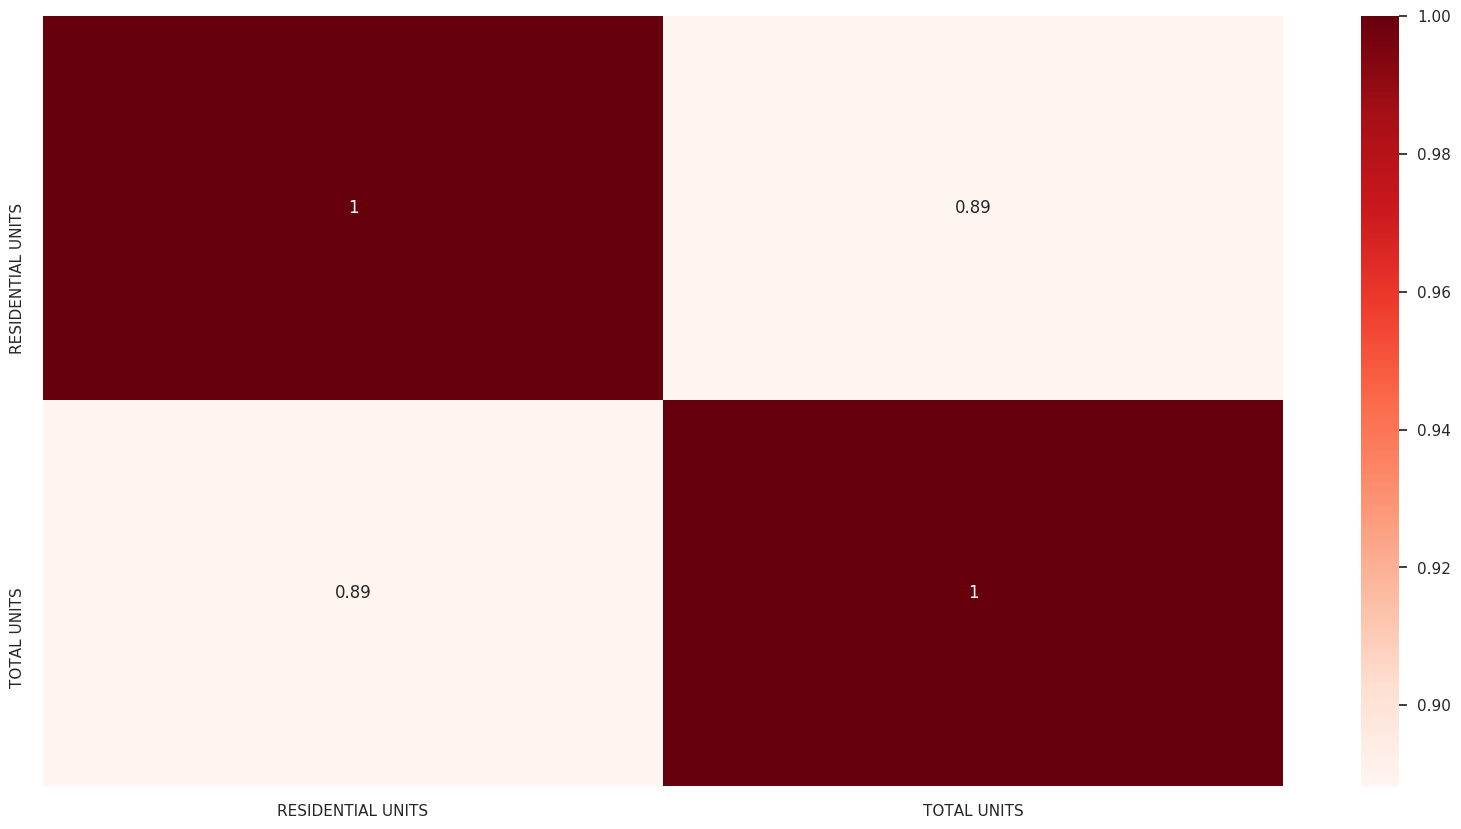

In [107]:
# Create heatmap of correlation coefficients
sns.heatmap(correlation_coefficients, annot=True, cmap='Reds')

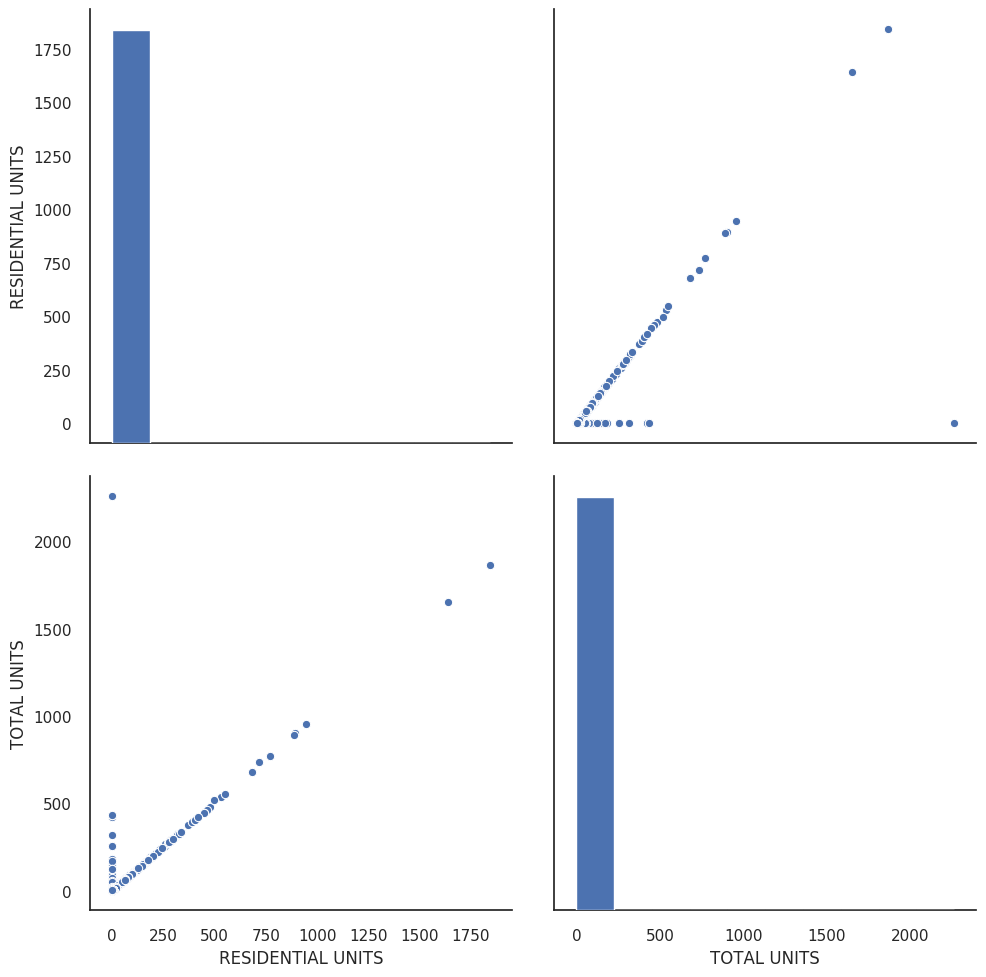

In [108]:
sns.pairplot(subset_data, height=5)

In [109]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [0]:
# Define Features
features = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE']

# Set X
X = data[features]

In [0]:
# Set y
y = data['SALE PRICE']

In [112]:
!pip install pandas_profiling

In [0]:
import pandas_profiling as pp

In [114]:
report = pp.ProfileReport(data)
report

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,22
Number of observations,84548
Total Missing (%),0.0%
Total size in memory,14.2 MiB
Average record size in memory,176.0 B
Numeric,10
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [0]:
report.to_file('data_assessment.html')

In [116]:
data['SALE PRICE'].head()

4    6625000
5        -  
6        -  
7    3936272
8    8000000
Name: SALE PRICE, dtype: object

In [0]:
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')

In [118]:
data['SALE PRICE'].head()

4    6625000.0
5          NaN
6          NaN
7    3936272.0
8    8000000.0
Name: SALE PRICE, dtype: float64

In [0]:
###Clean Data
#Convert to float
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')

In [120]:
data[['GROSS SQUARE FEET', 'LAND SQUARE FEET']].dtypes

GROSS SQUARE FEET    float64
LAND SQUARE FEET     float64
dtype: object

In [121]:
data['SALE PRICE'].isna().sum()

14561

In [122]:
data['SALE PRICE'] = data['SALE PRICE'].fillna(0)
data['SALE PRICE'].isna().sum()

0

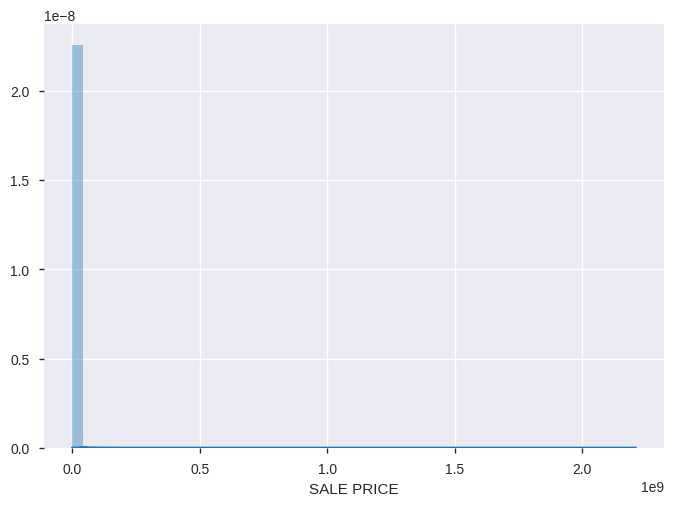

In [123]:
sns.distplot(data['SALE PRICE'])

In [0]:
#Remove rows in data where Sale Price is zero
new_data = data[data['SALE PRICE'] > 1000]

In [125]:
new_data['SALE PRICE'].describe()

count    5.860400e+04
mean     1.524388e+06
std      1.244863e+07
min      1.110000e+03
25%      3.850000e+05
50%      6.390865e+05
75%      1.097755e+06
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [0]:
# Convert to float
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
data['SALE PRICE'] = data['SALE PRICE'].fillna(0)

data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')

# Convert to date
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], errors='coerce')


# Remove 5th and 95th percentile tails
zero = 0
fifth = data['SALE PRICE'].describe(np.arange(0.05, 1, 0.05)).T['15%']
ninetyfifth = data['SALE PRICE'].describe(np.arange(0.05, 1, 0.05)).T['95%']
data = data[(data['SALE PRICE'] > zero) &
             (data['SALE PRICE'] <= ninetyfifth)].copy()

# Handle Missing Values by Dropping (for now)
data.dropna(inplace=True)


In [127]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,36128.000000,36128.000000,36128.000000,36128.000000,36128.000000,36128.000000,36128.000000,3.612800e+04,3.612800e+04,36128.000000,36128.000000,3.612800e+04
mean,3.424297,5284.633110,227.366364,10952.996097,1.735662,0.145649,1.887705,2.897620e+03,2.278095e+03,1850.794481,1.357424,6.942168e+05
std,0.924368,3625.421333,485.371196,1018.325400,11.859228,11.924159,16.893532,2.939887e+04,2.282113e+04,422.482484,0.677031,5.083709e+05
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000e+00
25%,3.000000,2376.000000,21.000000,10467.000000,1.000000,0.000000,1.000000,1.317000e+03,8.280000e+02,1920.000000,1.000000,3.750000e+05
50%,3.000000,4832.000000,45.000000,11219.000000,1.000000,0.000000,1.000000,2.175000e+03,1.505000e+03,1935.000000,1.000000,5.790000e+05
75%,4.000000,7380.000000,96.000000,11361.000000,2.000000,0.000000,2.000000,3.125000e+03,2.232000e+03,1963.000000,2.000000,8.800000e+05
max,5.000000,16319.000000,7501.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,3.000000e+06


In [0]:
# Define Features
features = ['BOROUGH', 'COMMERCIAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','RESIDENTIAL UNITS','LOT', 'BLOCK', 'ZIP CODE' ]

# Set X
X = data[features]

In [0]:
# Set y
y = data['SALE PRICE']

In [0]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [0]:
# Initialize model
model = RandomForestRegressor() 

In [132]:
# Fit Model
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [133]:
# calculate the R-squared
model.score(X_test, y_test)

0.4862851473733266

In [0]:
y_predicted = model.predict(X_test)

In [135]:
# We input new advertising data into the model to predict future sales

# Sample
new_data = [[2, 2, 10000,1,1,1,1,1]]
model.predict(new_data)

array([2566203.2])

In [136]:
np.sqrt(mse(y_predicted, y_test)) # Root mean squared error

360610.48176807957